In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

In [3]:
data = pd.read_csv('../data/churn_train.csv')

In [73]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [75]:
data['phone'].unique()

array(['Android', 'iPhone', nan], dtype=object)

In [76]:
#data['phone'] = data.loc[data['phone']==nan,"phone"]='Other'
data['phone'] = data['phone'].fillna('Other')
data['phone'].unique()

array(['Android', 'iPhone', 'Other'], dtype=object)

In [77]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     40000 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [79]:
df = pd.concat([data, pd.get_dummies(data['phone'])], axis=1)

In [80]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Android,Other,iPhone
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1,0,0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1,0,0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,0,0,1
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,1,0,0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0,0,1


In [81]:
df = df.drop('Other',axis =1)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Android,iPhone
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1,0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1,0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,0,1
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,1,0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0,1


In [82]:
df['city'].unique()

array(['Astapor', 'Winterfell', "King's Landing"], dtype=object)

In [83]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)
df = df.drop('phone',axis =1)
df = df.drop('city',axis =1)
df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Android,iPhone,Astapor,King's Landing,Winterfell
0,6.94,5.0,5.0,1.00,2014-05-03,2014-01-12,0.0,0,False,100.0,1,0,1,0,0
1,8.06,5.0,5.0,1.00,2014-01-26,2014-01-25,0.0,2,True,0.0,1,0,1,0,0
2,21.50,4.0,NaN,1.00,2014-05-21,2014-01-02,0.0,1,True,100.0,0,1,0,0,1
3,9.46,5.0,NaN,2.75,2014-01-10,2014-01-09,100.0,1,False,100.0,1,0,0,0,1
4,13.77,5.0,NaN,1.00,2014-05-13,2014-01-31,0.0,0,False,100.0,0,1,0,0,1


In [84]:
df = df.drop('Winterfell',axis =1)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
last_trip_date            40000 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
Android                   40000 non-null uint8
iPhone                    40000 non-null uint8
Astapor                   40000 non-null uint8
King's Landing            40000 non-null uint8
dtypes: bool(1), float64(6), int64(1), object(2), uint8(4)
memory usage: 2.9+ MB


In [94]:
df['avg_rating_of_driver'].unique()

array([5. , nan, 4. , 4.7, 3. , 3.7, 4.5, 3.3, 3.6, 4.3, 4.6, 3.8, 4.1,
       1. , 4.4, 4.9, 3.5, 4.8, 2. , 3.1, 3.4, 4.2, 2.8, 2.7, 2.5, 3.9,
       2.6, 1.9, 2.3, 3.2, 2.9, 2.1, 1.7, 1.5, 2.4, 2.2, 1.8, 1.6])

In [99]:
df['no_rating'] = df['avg_rating_of_driver'].isna().astype(int)

In [100]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
last_trip_date            40000 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
Android                   40000 non-null uint8
iPhone                    40000 non-null uint8
Astapor                   40000 non-null uint8
King's Landing            40000 non-null uint8
no_rating                 40000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(2), uint8(4)
memory usage: 3.2+ MB


In [101]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
last_trip_date            40000 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
Android                   40000 non-null uint8
iPhone                    40000 non-null uint8
Astapor                   40000 non-null uint8
King's Landing            40000 non-null uint8
no_rating                 40000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(2), uint8(4)
memory usage: 3.2+ MB


In [434]:
def transformations(data):
    
    data['phone'] = data['phone'].fillna('Other')
    
    df = pd.concat([data, pd.get_dummies(data['phone'])], axis=1)
    df = df.drop('Other',axis =1)
    df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)
    df = df.drop('phone',axis =1)
    df = df.drop('city',axis =1)
    df = df.drop('Winterfell',axis =1)
    
    df['no_rating'] = df['avg_rating_of_driver'].isna().astype(int)
    df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
    df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
    
    df["last_trip_date"]=pd.to_datetime(df['last_trip_date'])
    df["signup_date"]=pd.to_datetime(df['signup_date'])

    df["target"] = (df["last_trip_date"]<datetime.date(2014,6,1))*1
    
    df['signup_date'] = df['signup_date'].astype(np.int64) // 10**9
    
    df = df.drop('last_trip_date',axis =1)
    
    df['surge_pct'].apply(lambda x: np.log(x+1) if x < 80 else x)

    df["trips_in_first_30_days"] = df["trips_in_first_30_days"].apply(lambda x: df["trips_in_first_30_days"].mean() if x >70 else x)
    
    df = df[df.avg_surge < 5]
    return df

In [320]:
df["last_trip_date"]=pd.to_datetime(df['last_trip_date'])
df["target"] =  (df["last_trip_date"]<'2014-06-01')*1

In [321]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,Android,iPhone,Astapor,King's Landing,no_rating,target
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,0.301325,0.690700,0.330900,0.20360,0.163200,0.624200
std,5.708056,0.447180,0.562407,0.222427,20.014008,3.811289,37.089619,0.458839,0.462211,0.470543,0.40268,0.369553,0.484335
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


(array([ 8172.,  3424.,     0.,  3626.,     0.,  3658.,  6088.,     0.,
        14595.,   437.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

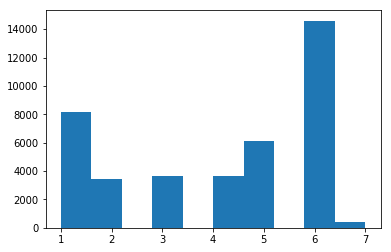

In [322]:
plt.hist(df["last_trip_date"].dt.month)

(array([15032.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24968.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

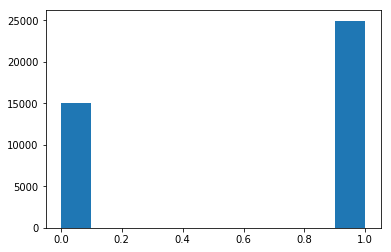

In [323]:
plt.hist(df["target"])

In [479]:
data = pd.read_csv('../data/churn_train.csv')
new_df = transformations(data)
#new_df["surge_pct"].max()
#df_right = new_df[new_df['surge_pct'] > 4.4]

In [480]:
y=new_df.pop('target').values

In [481]:
#X=new_df[["avg_rating_of_driver","Android",'signup_date']].values
X=new_df.values

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [457]:
def acc(model, X, y):
    y_pred = model.predict(X)
    return sum(y_pred==y)/len(y_pred)

In [458]:
model = LogisticRegression()
model.fit(X_train,y_train)
#y_pred = model.predict(X_test)
#acc(y_pred,y_test)
#acc=cross_val_score(model,X_test,y_test,cv=5,scoring = 'accuracy')
#soring = acc
accuracy=cross_val_score(model,X_test,y_test,cv=5,scoring = acc)

In [459]:
print(model.intercept_)
print(model.coef_)
accuracy.mean()

[2.62906442e-19]
[[1.21903738e-18 2.91799012e-19 3.65444269e-10]]


0.6236623935655985

In [439]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

accuracy=cross_val_score(model,X_test,y_test,cv=5,scoring = acc)

In [440]:
accuracy.mean()

0.753978063944516

In [441]:
model.feature_importances_

array([0.20311371, 0.10559668, 0.06395635, 0.07715728, 0.13502003,
       0.07265168, 0.07030723, 0.03563961, 0.11086712, 0.0161564 ,
       0.0230887 , 0.02243937, 0.05447809, 0.00952774])

In [442]:
test_data = pd.read_csv('data/churn_test.csv')

In [443]:
test_data = transformations(test_data)

In [444]:
test_y=test_data.pop('target').values
test_X=test_data.values

In [445]:
test_y_pred = model.predict(test_X)

In [446]:
sum(test_y_pred==test_y)/len(test_y)

0.7476495299059812

In [447]:
model.feature_importances_

array([0.20311371, 0.10559668, 0.06395635, 0.07715728, 0.13502003,
       0.07265168, 0.07030723, 0.03563961, 0.11086712, 0.0161564 ,
       0.0230887 , 0.02243937, 0.05447809, 0.00952774])

In [448]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,y_train)
accuracy=cross_val_score(model_gb,X_test,y_test,cv=5,scoring = acc)
print("Train: ",accuracy.mean())
test_y_pred = model_gb.predict(test_X)
print("Test: ",sum(test_y_pred==test_y)/len(test_y))

Train:  0.7878806193201549
Test:  0.7759551910382076


In [478]:
data = pd.read_csv('data/churn_train.csv')
#data[data['surge_pct']+0.000001 > 4.4]
data = data[data['surge_pct'] < 80]
len(data)

38842

In [409]:
data = pd.read_csv('../data/churn_train.csv')
df = transformations(data)
df["trips_in_first_30_days"] = df["trips_in_first_30_days"].apply(lambda x: df["trips_in_first_30_days"].mean() if x >70 else x)

In [433]:
df = df[df.avg_surge < 5]
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,Android,iPhone,Astapor,King's Landing,no_rating,target
count,39995.000000,39995.000000,39995.000000,39995.000000,3.999500e+04,39995.000000,39995.000000,39995.000000,39995.000000,39995.000000,39995.000000,39995.000000,39995.000000,39995.000000
mean,5.791626,4.777431,4.601767,1.074371,1.389877e+09,8.845948,2.276024,60.869491,0.301313,0.690711,0.330941,0.203625,0.163170,0.624153
std,5.708319,0.447185,0.562147,0.215820,7.559296e+05,19.989296,3.745117,37.089357,0.458834,0.462206,0.470558,0.402699,0.369526,0.484347
min,0.000000,1.000000,1.000000,1.000000,1.388534e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,1.389226e+09,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,1.389917e+09,0.000000,1.000000,66.700000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,6.930000,5.000000,5.000000,1.050000,1.390522e+09,8.300000,3.000000,100.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,4.750000,1.391126e+09,100.000000,63.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [432]:
sum(df['avg_surge']>6)

0

In [ ]:
a,b = partial_dependence(model_gb,)

In [496]:
ind=np.argsort(model_gb.feature_importances_)[::-1]
print(ind)
#feat_import.shape[0]
#feat_import.shape
#len(x_ind)
feat_import=model_gb.feature_importances_[ind]
feat_import
colnames=new_df.iloc[:,ind].columns
colnames
feat_import
model

[ 0  8  6  4  5  1  3  2 12  7 13 11 10  9]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

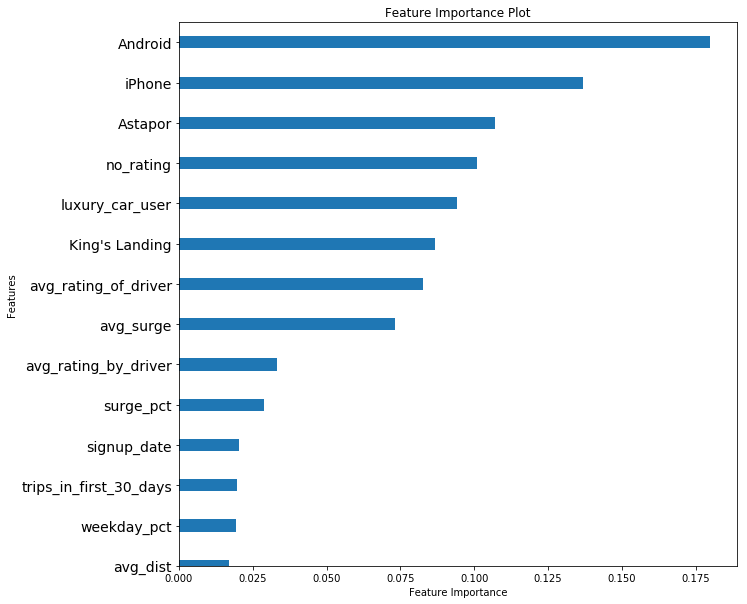

In [495]:
fig = plt.figure(figsize=(10, 10))
x_ind = np.arange(feat_import.shape[0])
plt.barh(x_ind, feat_import[::-1], height=.3, align='center')
plt.ylim(x_ind.min() + .5, x_ind.max() + .5)
plt.yticks(x_ind, colnames, fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")

plt.savefig('feat_imp.png')

In [485]:
gb_grid = {'loss': ['deviance','exponential'],'n_estimators': [100,150,200],
                  'min_samples_leaf': [1,2,3],
                  'max_depth': [3,4,6],
                  'max_features': [3,5,9],
                  'learning_rate': [.05,.1,.15,.2]}
gb_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gb_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
gb_gridsearch.fit(X_train, y_train)

print( "best parameters:", gb_gridsearch.best_params_ )

best_gb_model = gb_gridsearch.best_estimator_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed: 58.7min finished


best parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 200}


In [514]:
best_gb_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=6,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [487]:
model_gb = best_gb_model
model_gb.fit(X_train,y_train)
accuracy=cross_val_score(model_gb,X_test,y_test,cv=5,scoring = acc)
print("Train: ",accuracy.mean())
test_y_pred = model_gb.predict(test_X)
print("Test: ",sum(test_y_pred==test_y)/len(test_y))

Train:  0.7833799187199796
Test:  0.78375675135027


In [493]:
model_gb.feature_importances_

array([0.17994648, 0.08668567, 0.072999  , 0.08279417, 0.10090355,
       0.09422705, 0.1071537 , 0.02886613, 0.13672129, 0.01684964,
       0.01932952, 0.01976304, 0.03335587, 0.02040488])

In [ ]:
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [508]:
ind=np.argsort(model_gb.feature_importances_)[::-1]
print(ind)
#feat_import.shape[0]
#feat_import.shape
#len(x_ind)
feat_import=model_gb.feature_importances_[ind][:5]
feat_import
colnames=new_df.iloc[:,ind].columns[:5]
print(colnames)
x = feat_import/sum(feat_import)
x

[ 0  8  6  4  5  1  3  2 12  7 13 11 10  9]
Index(['avg_dist', 'weekday_pct', 'trips_in_first_30_days', 'signup_date',
       'surge_pct'],
      dtype='object')


array([0.29072764, 0.22089157, 0.17312117, 0.16302321, 0.15223642])

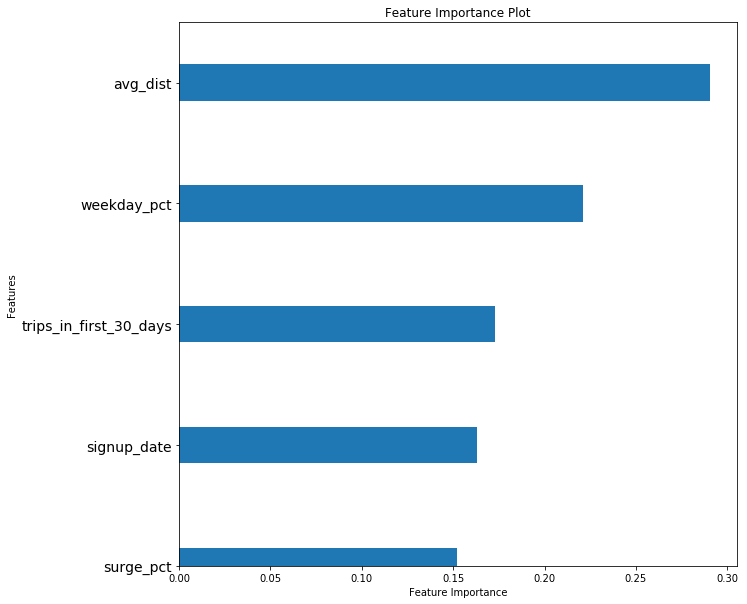

In [507]:
fig = plt.figure(figsize=(10, 10))
x_ind = np.arange(feat_import.shape[0])
plt.barh(x_ind, x[::-1], height=.3, align='center')
plt.ylim(x_ind.min() + .5, x_ind.max() + .5)
plt.yticks(x_ind, colnames[::-1], fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")

plt.savefig('feat_imp.png')

In [5]:
def transformations1(df):
    df['phone'] = df['phone'].map({'Android':1, 'iPhone': 0})

    df['phone'] = df['phone'].fillna(-1)
    df['city'] = df['city'].map({'Winterfell':0, 'Astapor': 1, 'King\'s Landing': 2})


    #df = pd.concat([data, pd.get_dummies(data['phone'])], axis=1)
    #df = df.drop('Other',axis =1)
    #df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)
    #df = df.drop('phone',axis =1)
    #df = df.drop('city',axis =1)
    #df = df.drop('Winterfell',axis =1)
    
    #df['no_rating'] = df['avg_rating_of_driver'].isna().astype(int)
    df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())
    df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())
    
    df["last_trip_date"]=pd.to_datetime(df['last_trip_date'])
    df["signup_date"]=pd.to_datetime(df['signup_date'])

    df["target"] = (df["last_trip_date"]<datetime.date(2014,6,1))*1
    
    df['signup_date'] = df['signup_date'].astype(np.int64) // 10**9
    
    df = df.drop('last_trip_date',axis =1)
    
    df['surge_pct'].apply(lambda x: np.log(x+1) if x < 80 else x)

    df["trips_in_first_30_days"] = df["trips_in_first_30_days"].apply(lambda x: df["trips_in_first_30_days"].mean() if x >70 else x)
    
    df = df[df.avg_surge < 4]
    return df

In [21]:
data = pd.read_csv('data/churn_train.csv')
df = transformations1(data)

In [22]:
y=df.pop('target').values
X=df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [9]:
test_data = pd.read_csv('data/churn_test.csv')
test_data = transformations1(test_data)
test_data.info()
test_y=test_data.pop('target').values
test_X=test_data.values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 12 columns):
avg_dist                  9995 non-null float64
avg_rating_by_driver      9995 non-null float64
avg_rating_of_driver      9995 non-null float64
avg_surge                 9995 non-null float64
city                      9995 non-null int64
phone                     9995 non-null float64
signup_date               9995 non-null int64
surge_pct                 9995 non-null float64
trips_in_first_30_days    9995 non-null float64
luxury_car_user           9995 non-null bool
weekday_pct               9995 non-null float64
target                    9995 non-null int64
dtypes: bool(1), float64(8), int64(3)
memory usage: 946.8 KB


In [16]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,y_train)
#accuracy=cross_val_score(model_gb,X_test,y_test,cv=5,scoring = acc)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [547]:
print("Train: ",accuracy.mean())
test_y_pred = model_gb.predict(test_X)
print("Test: ",sum(test_y_pred==test_y)/len(test_y))

Train:  0.7733645868980537
Test:  0.7821910955477739


In [592]:
ind = np.argsort(model_gb.feature_importances_)

In [593]:
colnames = test_data.columns[ind]
colnames

Index(['luxury_car_user', 'phone', 'city', 'avg_surge', 'avg_rating_of_driver',
       'avg_rating_by_driver', 'surge_pct', 'signup_date',
       'trips_in_first_30_days', 'weekday_pct', 'avg_dist'],
      dtype='object')

In [594]:
feat_import = sorted(model_gb.feature_importances_)

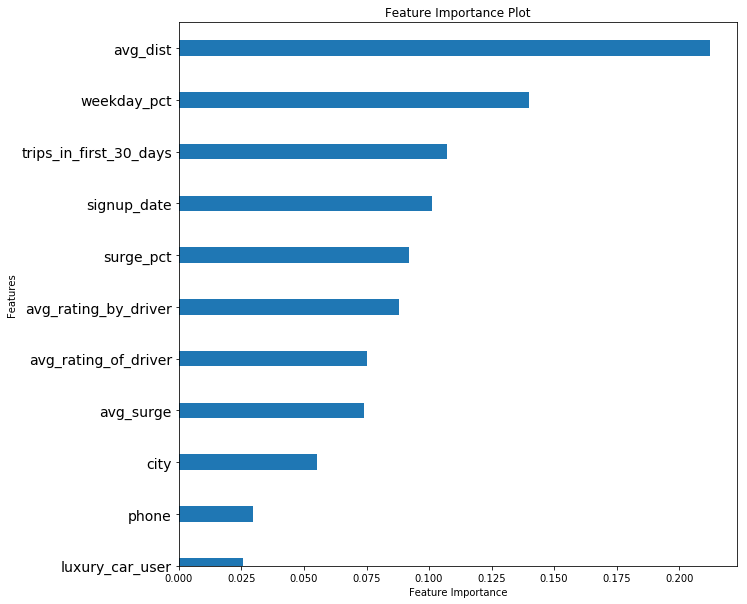

In [595]:
fig = plt.figure(figsize=(10, 10))
x_ind = np.arange(len(feat_import))
plt.barh(x_ind, feat_import, height=.3, align='center')
plt.ylim(x_ind.min() + .5, x_ind.max() + .5)
plt.yticks(x_ind, colnames, fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")

plt.savefig('feat_imp.png')

In [601]:
feature_importances = model_gb.feature_importances_
top10_colindex = np.argsort(feature_importances)[::-1][0:10]
feature_importances = feature_importances[top10_colindex]
feature_importances = feature_importances #/ float(feature_importances.max()) #normalize

In [602]:
all_feature_names = test_data.columns
feature_names = list(all_feature_names[top10_colindex])

In [603]:
print("1) Sorted features, their relative importances, and their indices:" )
for fn, fi, indx in zip(feature_names, feature_importances, top10_colindex):
    print("{0:<30s} | {1:6.3f} | {2}".format(fn, fi, indx))

1) Sorted features, their relative importances, and their indices:
avg_dist                       |  0.212 | 0
weekday_pct                    |  0.140 | 10
trips_in_first_30_days         |  0.107 | 8
signup_date                    |  0.101 | 6
surge_pct                      |  0.092 | 7
avg_rating_by_driver           |  0.088 | 1
avg_rating_of_driver           |  0.075 | 2
avg_surge                      |  0.074 | 3
city                           |  0.055 | 4
phone                          |  0.030 | 5


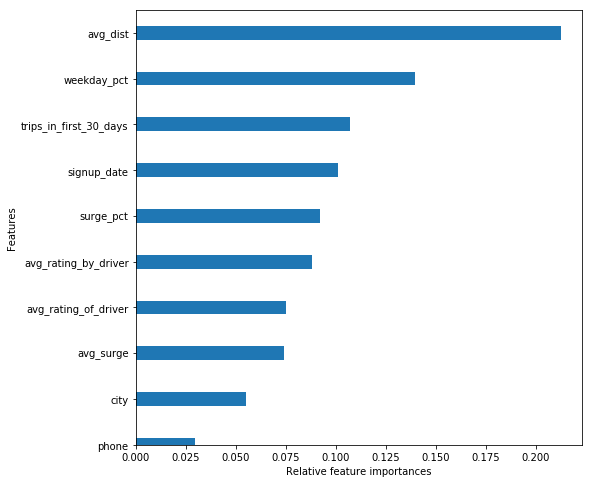

In [604]:
y_ind = np.arange(9, -1, -1) # 9 to 0
fig = plt.figure(figsize=(8, 8))
plt.barh(y_ind, feature_importances, height = 0.3, align='center')
plt.ylim(y_ind.min() + 0.5, y_ind.max() + 0.5)
plt.yticks(y_ind, feature_names)
plt.xlabel('Relative feature importances')
plt.ylabel('Features');

In [8]:
def standard_confusion_matrix(y_true,y_pred):
    tp = ((y_true==1) & (y_pred==1)).sum()
    fp = ((y_true==0) & (y_pred==1)).sum()
    fn = ((y_true==1) & (y_pred==0)).sum()
    tn = ((y_true==0) & (y_pred==0)).sum()
    return np.array([[tp,fp],[fn,tn]])

In [39]:
def profit_curve(cost_benefit, predicted_probs, labels):
    
    n_obs = len(labels)
    
    thresholds = sorted(np.append(1, predicted_probs))
    
    profits = []
    
    for threshold in thresholds:
        
        y_pred = predicted_probs >= threshold
        
        cm = standard_confusion_matrix(labels, y_pred)
        
        threshold_profit = np.sum(cm * cost_benefit)/n_obs
        
        profits.append(threshold_profit)
        
    return np.array(profits), np.array(thresholds)


def plot_profit_curve(model, cost_benefit, X_train, X_test, y_train, y_test):
    
    my_model = GradientBoostingClassifier()
    my_model.fit(X_train,y_train)
    test_probs = my_model.predict_proba(X_test)
    #print(test_probs)
    profits, thresholds = profit_curve(cost_benefit, test_probs[:,1], y_test)
    #print(thresholds)
    percentages = np.arange(0, 100, 100. / len(profits))
    plt.plot(thresholds, profits, label='toy data')
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.show()

In [32]:
y_pred = model_gb.predict(X_test)
len(y_pred)

9994